<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/project3/starter_bikesV1.1NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Neural Network

**Reading Meterial:**

https://byui-cse.github.io/cse450-course/module-04/reading.html#practical

# Case Study

https://byui-cse.github.io/cse450-course/module-04/intro.html

**Introduction**

WelcomeBike Bike Rentals is a Beijing-based bike rental company that has recently expanded to include a handful of US locations. You've been asked to build a neural network that will predict the number of bike rentals for a given day and hour for their Washington DC branch.

<br><br>
**Stakeholders**

These are the individuals your team will be helping during the case study:


*ZHAO, CEO OF WELCOMEBIKE*<br>
Our new DC branch is taking off again after COVID-19. I'm excited to see how machine learning can help us to avoid the mistakes of our competitors and prove to our investors that we have a winning business model.


*WILLIAM, INVESTMENT BANKER*<br>
Oh...it's you again.

Nearly every Chinese bike rental business anyone has invested in has gone bankrupt.

Mr. Zhao seems to think that AI can make all the difference, and our bank's investment board is curious to find out if he's right.

I'm here by their request to witness his failure—I mean, to see how it goes.


*JOHNNY, DATA SCIENCE INTERN*<br>
Hey, small world!

I'm visiting my grandma Peggy in Langley, Virginia and thought I'd stop by the capital and see how you're doing.
<br><br>
**STAKEHOLDER FOCUS AREAS**

The stakeholders are particularly interested in the following areas:

Building a neural network that can predict the number of bicycle rentals for a given day.
Understanding how weather, holidays, and other factors affect revenue.

# Questions


**NETWORK LAYERS AND HYPERPARAMETERS**

ZHAO, CEO OF WELCOMEBIKE
My brother-in-law works for a big AI company in Hong Kong. We've chatted a bit about neural networks, and I was wondering how many layers you think the network should have.

If you run your model on the data and the results seem lower than you expected, which of the following hyperparameters do you feel has the most potential for model improvement?

- Number of neurons and number of hidden layers.
- Learning rate and optimizer selection.
- Batch size and number of epochs.
- Activation functions of the layers and overall loss function.<br><br>

**FEATURE ENGINEERING**

JOHNNY, DATA SCIENCE INTERN<br>
Looking at the features we have, how do you think we should handle the temperature features?<br><br>

**LEARNING RATE**

ZHAO, CEO OF WELCOMEBIKE<br>
My brother-in-law told me that I should be careful with how I handle learning rate in my network.

What approach do you think you're going to take to find the optimal learning rate?<br><br>

**LOSS FUNCTION**

JOHNNY, DATA SCIENCE INTERN<br>

How will we know if our model has strong predictive power?

What are you planning to use for the loss function?<br><br>

**PREDICTIVE RISK MODEL**

WILLIAM, INVESTMENT BANKER

We would like use AI to predict the likelihood of damage based on user profile data, such as name, birthday, sex, or address, so that we can add an insurance premium to the rental cost. We are concerned that there may be ethical/legal implications here, what would you recommend?

Based on your initial analysis of the data, your team feels:

We can do this, as long as the users have provided that profile data and we have kept record of previous damages.
Using any profile data in this way would be inappropriate.
As long as we only use name and address, that would be fine.
Instead of using their profile data, we could track their usage via GPS and feed those live statistics (speed, angle, direction) into the model and deactivate the bike if the model predicts they will damage the bike. (For example, if they were going extremely fast down a crowded sidewalk.)<br><br>

**PANDEMIC AND HEALTH CONCERNS**

ZHAO, CEO OF WELCOMEBIKE
Coming out of the pandemic has put a strain on resources. Our customers are much more concerned about health and safety of sharing bikes.

In your executive summary, would you add your recommendations for when we could pull bikes out of rotation to clean and disinfect them? For example, what days and times we should bring them in?

We also need to know if we have any lasting problems now that we are a few years past COVID-19. What can we expect for forcasts into the future? Are we back on track or still recovering?

# Data Information

- Data:
https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv
- Dictionary:https://byui-cse.github.io/cse450-course/module-04/bikes-dictionary.txt

# Loading Data and Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')
dic= pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes_december.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112487 entries, 0 to 112486
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dteday        112487 non-null  object 
 1   hr            112474 non-null  float64
 2   casual        112487 non-null  int64  
 3   registered    112487 non-null  int64  
 4   temp_c        112487 non-null  float64
 5   feels_like_c  112487 non-null  float64
 6   hum           112487 non-null  float64
 7   windspeed     112487 non-null  float64
 8   weathersit    112487 non-null  int64  
 9   season        112487 non-null  int64  
 10  holiday       112487 non-null  int64  
 11  workingday    112487 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 10.3+ MB


In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,1/1/2011,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,0
1,1/1/2011,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,0
2,1/1/2011,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,0
3,1/1/2011,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,0
4,1/1/2011,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,0


In [4]:
dic.head(5)

,dteday,hr,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,workingday
0,11/1/2023,0,6.0,3.8,0.6359,10.8,1,4,0,1
1,11/1/2023,1,6.0,3.4,0.6333,12.7,1,4,0,1
2,11/1/2023,2,5.3,2.6,0.6598,12.0,1,4,0,1
3,11/1/2023,3,5.1,3.8,0.6636,6.3,1,4,0,1
4,11/1/2023,4,4.0,1.8,0.7192,8.4,1,4,0,1


In [5]:
from datetime import date
df['dteday']= pd.to_datetime(df['dteday'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112487 entries, 0 to 112486
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dteday        112487 non-null  datetime64[ns]
 1   hr            112474 non-null  float64       
 2   casual        112487 non-null  int64         
 3   registered    112487 non-null  int64         
 4   temp_c        112487 non-null  float64       
 5   feels_like_c  112487 non-null  float64       
 6   hum           112487 non-null  float64       
 7   windspeed     112487 non-null  float64       
 8   weathersit    112487 non-null  int64         
 9   season        112487 non-null  int64         
 10  holiday       112487 non-null  int64         
 11  workingday    112487 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 10.3 MB


# Data Analysis

Text(0.5, 0, 'Number')

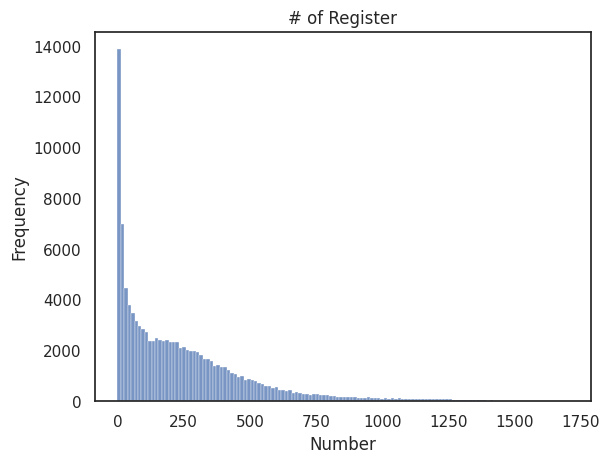

In [7]:
sns.set()
sns.set_style('white')
graph1=sns.histplot(data=df, x='registered', bins='auto')#hue='species' graph1.set_title("Price")
graph1.set_title("# of Register")
graph1.set_ylabel("Frequency")
graph1.set_xlabel("Number")

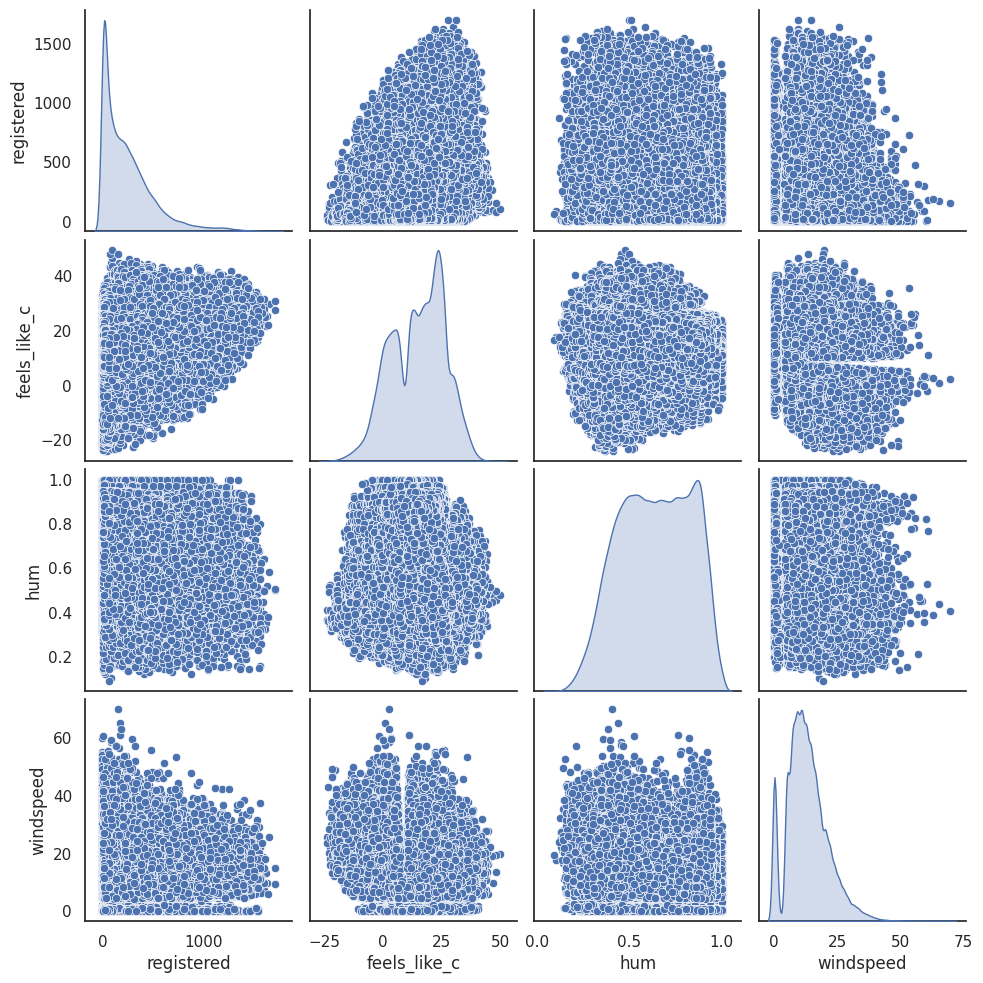

In [8]:
sns.pairplot(df[['registered', 'feels_like_c', 'hum', 'windspeed']], diag_kind='kde')

# Cleaning and Transformation Data

In [9]:
df.isna().sum()

dteday           0
hr              13
casual           0
registered       0
temp_c           0
feels_like_c     0
hum              0
windspeed        0
weathersit       0
season           0
holiday          0
workingday       0
dtype: int64

In [10]:
df = df.dropna()


In [11]:
df['weathersit'].unique()

array([1, 2, 3, 4])

In [12]:
df['season'] = df['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})

<ipython-input-12-2e58c0832c7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['season'].map({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})


In [13]:
df = pd.get_dummies(df, columns=['season'], prefix='', prefix_sep='')
#df = pd.get_dummies(df, columns=['season'], prefix='', prefix_sep='')
df.tail()

,dteday,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,holiday,workingday,fall,spring,summer,winter
112482,2023-10-31,19.0,241,594,10.2,10.2,0.4516,8.4,2,0,1,1,0,0,0
112483,2023-10-31,20.0,171,450,8.9,7.5,0.5268,9.3,1,0,1,1,0,0,0
112484,2023-10-31,21.0,176,402,7.7,6.4,0.5756,7.8,1,0,1,1,0,0,0
112485,2023-10-31,22.0,106,257,8.0,8.0,0.5604,0.0,1,0,1,1,0,0,0
112486,2023-10-31,23.0,78,135,6.5,6.5,0.6401,4.5,1,0,1,1,0,0,0


# Neuro Network Model

## Split Data

In [14]:
df.columns

Index(['dteday', 'hr', 'casual', 'registered', 'temp_c', 'feels_like_c', 'hum',
       'windspeed', 'weathersit', 'holiday', 'workingday', 'fall', 'spring',
       'summer', 'winter'],
      dtype='object')

In [15]:
X=df[['dteday','hr', 'casual', 'temp_c', 'feels_like_c', 'hum',
       'windspeed', 'weathersit', 'holiday', 'workingday', 'fall', 'spring',
       'summer', 'winter']]

In [16]:
y=df['registered']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [18]:
X_train.count()

dteday          78731
hr              78731
casual          78731
temp_c          78731
feels_like_c    78731
hum             78731
windspeed       78731
weathersit      78731
holiday         78731
workingday      78731
fall            78731
spring          78731
summer          78731
winter          78731
dtype: int64

In [19]:
df.describe().transpose()[['mean', 'std']]

,mean,std
hr,11.501307,6.921640
casual,90.440351,128.654286
registered,249.208973,258.258870
temp_c,15.377185,9.748639
feels_like_c,14.660352,11.427101
hum,0.636616,0.190325
windspeed,13.099392,7.856017
weathersit,1.405303,0.683237
holiday,0.030300,0.171413
workingday,0.684229,0.464824


## Normalization selected columns

In [20]:
'''selected_columns = ['temp_c', 'feels_like_c','windspeed','weathersit']
# Select only the specified columns from the DataFrame

df_selected = X_train[selected_columns]

X_train_tf_selected = tf.constant(df_selected.values, dtype=tf.float32)

# Create Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train_tf_selected)

# Normalize the data
X_train_norm_tf_selected = normalizer(X_train_tf_selected)

# Convert normalized tensor back to pandas DataFrame
X_train_norm_df_selected = pd.DataFrame(X_train_norm_tf_selected.numpy(), columns=selected_columns)'''


"selected_columns = ['temp_c', 'feels_like_c','windspeed','weathersit']\n# Select only the specified columns from the DataFrame\n\ndf_selected = X_train[selected_columns]\n\nX_train_tf_selected = tf.constant(df_selected.values, dtype=tf.float32)\n\n# Create Normalization layer\nnormalizer = tf.keras.layers.Normalization(axis=-1)\nnormalizer.adapt(X_train_tf_selected)\n\n# Normalize the data\nX_train_norm_tf_selected = normalizer(X_train_tf_selected)\n\n# Convert normalized tensor back to pandas DataFrame\nX_train_norm_df_selected = pd.DataFrame(X_train_norm_tf_selected.numpy(), columns=selected_columns)"

In [21]:
selected_columns = ['temp_c', 'feels_like_c','windspeed','weathersit']
# Select only the specified columns from the DataFrame

df_selected = X_train[selected_columns]

X_train_tf_selected = tf.constant(df_selected.values, dtype=tf.float32)

# Create a normalization layer for each column
normalizers = []
for column in selected_columns:
    normalizer = tf.keras.layers.Normalization(axis=None)
    column_values = X_train_tf_selected[:, df_selected.columns.get_loc(column)]
    normalizer.adapt(column_values)
    normalizers.append(normalizer)

# Normalize each column individually
normalized_columns = []
for normalizer in normalizers:
    normalized_column = normalizer(X_train_tf_selected)
    normalized_columns.append(normalized_column)

# Concatenate the normalized columns into a DataFrame
# Concatenate the normalized columns into a DataFrame
X_train_norm_df_selected = pd.DataFrame(tf.concat(normalized_columns, axis=0).numpy(), columns=selected_columns)


In [22]:
X_train_norm_df_selected

,temp_c,feels_like_c,windspeed,weathersit
0,-1.188347,-1.598199,0.287120,-1.475244
1,0.369090,0.369090,-1.546968,-1.270318
2,1.158055,1.158055,0.512538,-1.475244
3,0.635494,0.635494,0.102686,-1.475244
4,-1.198593,-1.721155,1.188794,-1.270318
...,...,...,...,...
314919,28.145491,28.145491,16.563086,0.875525
314920,6.153583,0.875525,24.773396,-0.590602
314921,39.874508,41.047409,21.108082,0.875525
314922,-6.161885,-14.518810,25.213236,-0.590602


In [23]:
# dropping columns that were standarize in the previous step.
X_train.drop(columns= ['temp_c', 'feels_like_c','windspeed','weathersit'], inplace=True)

In [24]:
y_train.count()

78731

In [25]:
X_train.reset_index(drop=True, inplace=True)
X_train_norm_df_selected.reset_index(drop=True, inplace=True)

In [26]:
concatenated_df = pd.concat([X_train, X_train_norm_df_selected], axis=1)

In [27]:
concatenated_df

,dteday,hr,casual,hum,holiday,workingday,fall,spring,summer,winter,temp_c,feels_like_c,windspeed,weathersit
0,2017-02-14,10.0,21.0,0.5503,0.0,1.0,0.0,0.0,0.0,1.0,-1.188347,-1.598199,0.287120,-1.475244
1,2014-05-22,7.0,25.0,0.8958,0.0,1.0,0.0,1.0,0.0,0.0,0.369090,0.369090,-1.546968,-1.270318
2,2011-08-25,10.0,37.0,0.7104,0.0,1.0,0.0,0.0,1.0,0.0,1.158055,1.158055,0.512538,-1.475244
3,2019-10-09,14.0,71.0,0.4759,0.0,1.0,1.0,0.0,0.0,0.0,0.635494,0.635494,0.102686,-1.475244
4,2014-03-30,15.0,1.0,0.8284,0.0,0.0,0.0,1.0,0.0,0.0,-1.198593,-1.721155,1.188794,-1.270318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314919,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.145491,28.145491,16.563086,0.875525
314920,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.153583,0.875525,24.773396,-0.590602
314921,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.874508,41.047409,21.108082,0.875525
314922,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.161885,-14.518810,25.213236,-0.590602


In [28]:
X_train_norm_df_selected=concatenated_df

In [29]:
X_train_norm_df_selected.count()

dteday           78731
hr               78731
casual           78731
hum              78731
holiday          78731
workingday       78731
fall             78731
spring           78731
summer           78731
winter           78731
temp_c          314924
feels_like_c    314924
windspeed       314924
weathersit      314924
dtype: int64

In [30]:
y_train.count()

78731

## Training Model 1

In [31]:
from tensorflow.keras.optimizers import Adam
lm = Sequential()

# Add layers to the model
lm.add(Dense(128, activation='relu', input_shape=(X_train_norm_df_selected.shape[1],)))
lm.add(Dense(64, activation='relu'))
lm.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.1)
lm.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

# Display model summary
lm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10241 (40.00 KB)
Trainable params: 10241 (40.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78731 entries, 0 to 78730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      78731 non-null  datetime64[ns]
 1   hr          78731 non-null  float64       
 2   casual      78731 non-null  int64         
 3   hum         78731 non-null  float64       
 4   holiday     78731 non-null  int64         
 5   workingday  78731 non-null  int64         
 6   fall        78731 non-null  uint8         
 7   spring      78731 non-null  uint8         
 8   summer      78731 non-null  uint8         
 9   winter      78731 non-null  uint8         
dtypes: datetime64[ns](1), float64(2), int64(3), uint8(4)
memory usage: 3.9 MB


In [33]:
%%time
history = lm.fit(
    X_train_norm_df_selected,
    y_train,
    epochs=50,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

ValueError: Data cardinality is ambiguous:
  x sizes: 251939
  y sizes: 78731
Make sure all arrays contain the same number of samples.

In [34]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head(10)

NameError: name 'history' is not defined

In [ ]:
def plot_loss(hist):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim()
  plt.xlabel('Epoch')
  plt.ylabel('Error [#]')
  plt.legend()
  plt.grid(True)

In [ ]:
plot_loss(history)

## Model 2

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(X_train_norm_df_selected)

In [ ]:
linear_model.layers[1].kernel

In [ ]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    X_train_norm_df_selected,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [ ]:
plot_loss(history)

## Predictions

In [ ]:
df_use=pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/biking_holdout_test_mini.csv')
df_use.info()

In [ ]:
df_use

In [ ]:
selected_columns = ['temp_c', 'feels_like_c','windspeed','weathersit']
# Select only the specified columns from the DataFrame

df_selected = df_use[selected_columns]

X_train_tf_selected = tf.constant(df_selected.values, dtype=tf.float32)

# Create Normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train_tf_selected)

# Normalize the data
X_train_norm_tf_selected = normalizer(X_train_tf_selected)

# Convert normalized tensor back to pandas DataFrame
X_test_norm_df_selected = pd.DataFrame(X_train_norm_tf_selected.numpy(), columns=selected_columns)

In [ ]:
X_test_norm_df_selected

In [ ]:
print(X_test_norm_df_selected.shape)

In [ ]:
predictions = lm.predict(X_test_norm_df_selected)

In [ ]:
predictions = predictions.reshape(-1)
# Create a DataFrame with predictions
predictions_df1 = pd.DataFrame({'price': predictions})

# Save predictions to a CSV file
predictions_df1.to_csv('team8-module3-predictions.csv', index=False)